<img src = https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png width = 200>

<div>
## <center> Statistics in Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from IPython.display import display, HTML
page = '''
<iframe height="600" allowTransparency="true" frameborder="0" scrolling="no" style="width:100%;border:none"  src="https://bigdatamaven.wufoo.eu/embed/x1oara2h0aeawsv/"><a href="https://bigdatamaven.wufoo.com/forms/x1oara2h0aeawsv/">Fill out my Wufoo form!</a></iframe>
'''
display(HTML(page))

### Analyze results

Data import & cleaning

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('https://ibm.box.com/shared/static/0eaja6mux56kb0bjtsestmg5lq5gapaz.csv')

#Data Cleaning

#Keep completed surveys only
df = df[df['Completion Status'] == 1]

#Remove irrelevant columns
df.drop(['Date Created', 'Created By', 'Last Updated', 'Updated By',
       'IP Address', 'Last Page Accessed', 'Completion Status'], 1, inplace=True)

#Rename columns
df.columns = ['ID','ROOM','AGE','GENDER','DEGREE','EDUYEARS',
              'PICK1TO10','PICK10TO1',
              'EXP_PY','EXP_ST','EXP_ML','EXP_BD','EXP_DL',
              'RECALL',
              'PARISROME3','PARISROME2',
              'SNORE','SKY','SLEEP']

#Codify string responses into numeric values
df[['EXP_PY']] = df['EXP_PY'].map({'0 - No experience': 0, 
                                 '1 - Little experience': 1,
                                 '2 - Some experience': 2,
                                 '3 - Very experienced': 3
                                })
df['EXP_ST'] = df['EXP_ST'].map({'0 - No experience': 0, 
                                 '1 - Little experience': 1,
                                 '2 - Some experience': 2,
                                 '3 - Very experienced': 3
                                })
df['EXP_ML'] = df['EXP_ML'].map({'0 - No experience': 0, 
                                 '1 - Little experience': 1,
                                 '2 - Some experience': 2,
                                 '3 - Very experienced': 3
                                })
df['EXP_BD'] = df['EXP_BD'].map({'0 - No experience': 0, 
                                 '1 - Little experience': 1,
                                 '2 - Some experience': 2,
                                 '3 - Very experienced': 3
                                })
df['EXP_DL'] = df['EXP_DL'].map({'0 - No experience': 0, 
                                 '1 - Little experience': 1,
                                 '2 - Some experience': 2,
                                 '3 - Very experienced': 3
                                })
df['SNORE'] = df['SNORE'].map({'No': 0, 'Yes': 1})
df['SKY'] = df['SKY'].map({'No': 0, 'Yes': 1})
df['SLEEP'] = df['SLEEP'].map({'No': 0, 'Yes': 1})

#Dummify each recall word
df_dummies = df['RECALL'].str.get_dummies(sep=',') #create a new column for each word
memorylist = ['bed',
'rest',
'awake',
'tired',
'dream',
'wake',
'snooze',
'blanket',
'doze',
'slumber',
'snore',
'nap',
'peace',
'yawn',
'drowsy',
'sleep']
df_dummies = df_dummies[list(set(memorylist).intersection(df_dummies.columns.values))] #reduce to wordlist items only
df_dummies_nosleep = df_dummies.drop('sleep', 1) #remove sleep
df_dummies['RECALLSCORE'] = df_dummies_nosleep.sum(axis=1) #get recallscore for non-"sleep" word items
df = pd.concat([df, df_dummies], axis=1) #concatenate with original df
df.head()

,ID,ROOM,AGE,GENDER,DEGREE,EDUYEARS,PICK1TO10,PICK10TO1,EXP_PY,EXP_ST,EXP_ML,EXP_BD,EXP_DL,RECALL,PARISROME3,PARISROME2,SNORE,SKY,SLEEP,awake,dream,snore,bed,peace,tired,yawn,sleep,RECALLSCORE
0,34,LEFT SIDE,NaN,NaN,High school degree,15,1.0,NaN,0,0,1,1,1,"bed,snore,peace,yawn,sleep,dream",A trip to Paris with free breakfast,NaN,0,0,0,0,1,1,1,1,0,1,1,5
1,35,LEFT SIDE,55.0,Male,"Doctorate degree (PhD, MD)",20,4.0,NaN,1,1,2,2,3,"bed,snore",A trip to Rome with free breakfast,NaN,0,0,1,0,0,1,1,0,0,0,0,2
2,36,LEFT SIDE,34.0,Female,"Doctorate degree (PhD, MD)",22,5.0,NaN,1,2,1,1,1,"bed,snore,sleep,dream,awake,yawn,tired,snore",A trip to Paris with free breakfast,NaN,1,1,0,1,1,1,1,0,1,1,1,6
3,37,RIGHT SIDE,55.0,Female,"Doctorate degree (PhD, MD)",24,NaN,8.0,0,1,1,2,2,snore,NaN,A trip to Paris with free breakfast,0,1,0,0,0,1,0,0,0,0,0,1
4,38,RIGHT SIDE,44.0,Male,Master's or equivalent degree,12,NaN,7.0,1,1,2,0,1,"yawn,tired,sleep",NaN,A trip to Rome with free breakfast,1,1,0,0,0,0,0,0,1,1,1,2


**ID**: Response ID  
**ROOM**: LEFTSIDE or RIGHTSIDE  
**AGE**: Age in years, or NaN  
**GENDER**: Male, Female, or NaN  
**DEGREE**: High School degree, Master's or equivalent degree, or Doctorate degree (PhD, MD)  
**EDUYEARS**: Number of years of education  
**PICK1TO10**: Number between 1 and 10, chosen from an increasing list starting at 1  
**PICK1TO10**: Number between 1 and 10, chosen from a decreasing list starting at 10  
**EXP_PY**: Experience with Python from 0 (No Experience) to 3 (Very Experienced)  
**EXPT_ST**: Experience with Statistics and Data Analysis from 0 (No Experience) to 3 (Very Experienced)  
**EXPT_ML**: Experience with Machine Learning from 0 (No Experience) to 3 (Very Experienced)  
**EXPT_BD**: Experience with Big Data from 0 (No Experience) to 3 (Very Experienced)  
**EXPT_DL**: Experience with Deep Learning from 0 (No Experience) to 3 (Very Experienced)  
**RECALL**: Raw list of words recalled from list: _bed, rest, awake, tired, dream, wake, snooze, blanket, doze, slumber, snore, nap, peace, yawn, drowsy, sleep_  
**PARISROME3**: Choice from THREE options: _A trip to Rome with free breakfast_, _A trip to Paris with free breakfast_, _A trip to Paris without free breakfast_  
**PARISROME2**: Choice from TWO options: _A trip to Rome with free breakfast_, _A trip to Paris with free breakfast_  
**SNORE**: Did they recall an actual word "snore" from the original word list (Yes - 1, No - 0)  
**SKY**: Did they recall "sky" that was NOT in the original word list (Yes - 1, No - 0)  
**SLEEP**: Did they recall "sleep" that was a related word but NOT in the original word list (Yes - 1, No - 0)  
**{words}**: Columns for recall of each word from the word list  
**RECALLSCORE**: Total number of correctly recalled words  

# Descriptive Statistics

#### Number of survey responses

In [4]:
print(len(df))

print('There were [%s] complete survey responses.' % len(df))

5
There were [5] complete survey responses.


### Distribution of Academic Degrees

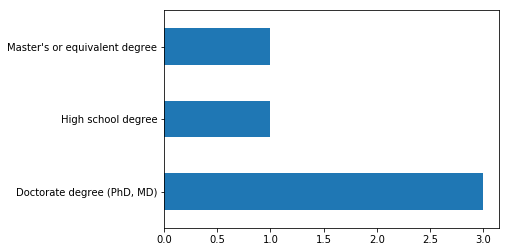

In [5]:
df.DEGREE.value_counts().plot(kind='barh')

Text(0.5,1,'DEGREE')

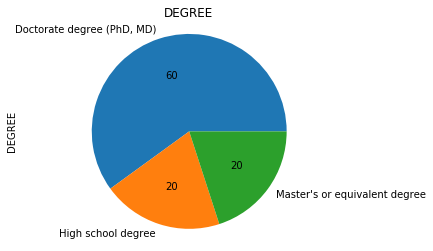

In [6]:
df.DEGREE.value_counts().plot(kind='pie', autopct='%.f')
plt.axis('equal')
plt.title("DEGREE")

## AGE

In [7]:
print(df.AGE)

0     NaN
1    55.0
2    34.0
3    55.0
4    44.0
Name: AGE, dtype: float64


#### Mean, SD, var

In [8]:
age_mean = df.AGE.mean() #mean
age_std = df.AGE.std() #standard deviation
age_var = df.AGE.var() #variance

print('The AGE of respondents: \n MEAN = ' + str(age_mean) +
      '\n STANDARD DEVIATION = ' + str( round(age_std,2) ) +
      '\n VARIANCE = ' + str(age_var)
    )

The AGE of respondents: 
 MEAN = 47.0
 STANDARD DEVIATION = 10.1
 VARIANCE = 102.0


In [ ]:
df.boxplot('AGE')

#### Quick summary of numeric columns

In [ ]:
df.describe()

## Normal distribution, Z-scores & Probability

<img src = https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/2000px-Standard_deviation_diagram.svg.png width = 400>

Import Scipy Statistics module

In [ ]:
import scipy.stats as st

### Cumulative Density Function

In [ ]:
## P(Z = 0)
st.norm.cdf(0)

#### What is the probability of a value that falls between -1 SD and 0 SD?

In [ ]:
## P(-1 < Z < 0)
st.norm.cdf(0) - st.norm.cdf(-1)

#### What is the probability density between -1 SD and +1 SD?

In [ ]:
## P(-1 < Z < 1)
st.norm.cdf(1) - st.norm.cdf(-1)

#### What is $P(-2 < Z < 2)$?

In [ ]:
## P(-2 < Z < 2)
st.norm.cdf(2) - st.norm.cdf(-2)

#### What is $P(-3 < Z < 3)$?

In [ ]:
st.norm.cdf(3) - st.norm.cdf(-3)

### Survey Results

Let's assume we have a normal distribution, with mean & SD from our survey respondents

In [ ]:
print('The AGE of respondents: \n MEAN = ' + str(age_mean) +
      '\n STANDARD DEVIATION = ' + str( round(age_std,2) ) +
      '\n VARIANCE = ' + str(age_var)
    )

#### What is the probability of  age $30 < X < 40$?

In [ ]:
x1 = 30
x1_zscore = (x1 - age_mean) / age_std
print(x1_zscore)

In [ ]:
x2 = 40
x2_zscore = (x2 - age_mean) / age_std
print(x2_zscore)

In [ ]:
p30to40 = st.norm.cdf(x2_zscore) - st.norm.cdf(x1_zscore)

print("The probability of an age between 30 and 40 \n" + 
      "in a normal distribution with mean = %s and SD = %s \n is %s") % (age_mean, round(age_std,2), round(p30to40,2))

## Memory: Recall of Word List

- bed
- rest
- awake
- tired
- dream
- wake
- snooze
- blanket
- doze
- slumber
- snore
- nap
- peace
- yawn
- drowsy

In [ ]:
df.ix[:,19:]

In [ ]:
df.ix[:,19:-1].sum().plot(kind='barh')

#### Memory: by Gender

In [ ]:
df.groupby('GENDER').RECALLSCORE.mean()

In [ ]:
df.boxplot(column=['RECALLSCORE'], by="GENDER")

print(df.groupby('GENDER').RECALLSCORE.describe())

To compare means between two groups, we can use a simple ANOVA or t-test.

In [ ]:
from scipy import stats
#ANOVA
F, p = stats.f_oneway(df[df.GENDER == "Male"].RECALLSCORE, 
                      df[df.GENDER == "Female"].RECALLSCORE)


#Report results
if p < 0.05:
    print("A statistically significant difference was found")
else:
    print("No statistically significant difference was found")
    
print("between MALE (mean = %s, SD = %s) and \n \
        FEMALE (mean = %s, SD = %s)" % (df[df.GENDER=="Male"].AGE.mean(),
                                        round(df[df.GENDER=="Male"].AGE.std(),1),
                                        df[df.GENDER=="Female"].AGE.mean(),
                                        round(df[df.GENDER=="Female"].AGE.std(),1))
     )
                                                             
print("F(1,%s) = %s, p = %s" % (len(df.RECALLSCORE)-2,
                                F,
                                round(p,3))
     )


### T-test
#from scipy.stats import ttest_ind
#t, p = ttest_ind(df[df.GENDER == "Male"].RECALLSCORE, 
#                      df[df.GENDER == "Female"].RECALLSCORE, equal_var=True)
#
#print(t)
#print(p)

#### Recall Rate x Age

In [ ]:
df[["AGE","RECALLSCORE"]]

In [ ]:
df.plot.scatter("AGE","RECALLSCORE")

In [ ]:
df[pd.notnull(df['AGE'])]['AGE']

### Does age correlate with word recall?
Correlation: AGE x RECALLSCORE

In [ ]:
age_val = df[pd.notnull(df['AGE'])]['AGE']
recall_val = df[pd.notnull(df['AGE'])]['RECALLSCORE']

age_pearson, age_pval = stats.pearsonr(age_val, recall_val)
print "The Pearson Correlation Coefficient \n \
    between AGE and RECALLSCORE is %s (p = %s)." % (round(age_pearson,2), round(age_pval,3))

### Does education correlate with word recall?
Correlation: EDUYEARS (Years of Education) x RECALLSCORE

In [ ]:
edu_val = df[pd.notnull(df['EDUYEARS'])]['EDUYEARS']
recall_val = df[pd.notnull(df['EDUYEARS'])]['RECALLSCORE']

edu_pearson, edu_pval = stats.pearsonr(edu_val, recall_val)
print "The Pearson Correlation Coefficient \n \
    between AGE and RECALLSCORE is %s (p = %s)." % (round(edu_pearson,2), round(edu_pval,3))

### False Memory

#### Did people incorrectly recall the word "sleep", even though it was not part of the wordlist?

In [ ]:
df.sleep.value_counts()

In [ ]:
df.sleep.value_counts().plot(kind='pie', autopct='%.f')
plt.axis('equal')
plt.title("Recall of 'sleep'? (0 = No, 1 = Yes)")

### Compare recall of actual word (SNORE), false word (SLEEP), and never-seen word (SKY)

In [ ]:
df[["SNORE","SLEEP","SKY"]].sum().plot(kind='barh')
plt.title("Did you see any of the following words in the word list?")

## Decoy Effect

#### Null Hypothesis:   
With or without a decoy, people should be equally likely to choose:  
("A trip to **Paris with** free breakfast") = ("A trip to **Rome with** free breakfast")

#### Alternative Hypothesis:  
With a decoy present ("A trip to **Paris without** free breakfast"), people will be more likely to choose:  
"A trip to **Paris with** free breakfast than "A trip to **Rome with** free breakfast"



In [ ]:
df.PARISROME3.value_counts().plot(kind='pie', autopct='%.f')
plt.axis('equal')
plt.title("WITH DECOY")

In [ ]:
df.PARISROME2.value_counts().plot(kind='pie', autopct='%.f')
plt.axis('equal')
plt.title("WITHOUT DECOY")

In [ ]:
df.PARISROME2

In [ ]:
df.PARISROME3[df.PARISROME3.notnull()]

In [ ]:
len(df.PARISROME3[df.PARISROME3.notnull()])

In [ ]:
df.PARISROME3 != "A trip to Paris with free breakfast"

In [ ]:
withdecoy = sum(df.PARISROME3 == "A trip to Paris with free breakfast")/float(sum(df.PARISROME3.notnull()))

withoutdecoy = sum(df.PARISROME2 == "A trip to Paris with free breakfast")/float(sum(df.PARISROME2.notnull()))



print("With decoy: %s \nWithout decoy: %s" % (withdecoy, withoutdecoy))

#### Chi-square test

In [ ]:
decoy_target = sum(df.PARISROME3 == "A trip to Paris with free breakfast")
nodecoy_target = sum(df.PARISROME2 == "A trip to Paris with free breakfast")
decoy_other = len(df.PARISROME3[df.PARISROME3.notnull()]) - decoy_target
nodecoy_other = len(df.PARISROME2[df.PARISROME2.notnull()]) - nodecoy_target

In [ ]:
from scipy import stats
prop_array = np.array([[decoy_target, decoy_other],
                       [nodecoy_target,nodecoy_other]])
x2, p, df, expected = stats.chi2_contingency(prop_array)

print(prop_array)
print("The chi-square value is %s, p = %s" % (x2,round(p,3)))

<hr>

### Looking to learn more statistics? Check out the free [Statistics 101](https://cocl.us/statistics101-dsbootcamp) course:

<a href=https://cocl.us/statistics101-dsbootcamp><img src=https://ibm.box.com/shared/static/0jm6371sdmir3w9mzaevx2x9j8s5qsrz.png></a>

### <center> To learn more, check out the free courses available on [IBM Cognitive Class](https://cocl.us/cc_courses_dsbootcamp):

<div>
<a href = https://cocl.us/cc_courses_dsbootcamp><img src = https://ibm.box.com/shared/static/66h8iy2qwaai57ldjqj70jgkm9gq9ny3.png></a></div>